## Competition #2: Computer Vision - Facial Recognition
Billy Hau - 7/27/2022

In this Computer Vision competition, we will learn how to apply Deep Learning to Facial Recognition. This used to be extremely difficult and people earned PhD on solving this problem. But nowadays, with Convolutional Neural Network, you can do it at home! 

<a href='https://www.kaggle.com/t/9ddb0751768f4d0f8b54d48d99b6c5be'>https://www.kaggle.com/t/9ddb0751768f4d0f8b54d48d99b6c5be</a>

** Convolutional Neural Network involve a huge number of parameters. It is highly recommended that you follow the slides to setup your GPU for CUDA computing, else it will take forever! If you don't have a GPU, use Google Collab. Don't forget to upload this notebook and the other image folders **

Let's take a look at the data! 

The there are 3 folder included in this zip folder: train / val / test

<li> <b>train</b> - this is the data containing the training images</li>
<li> <b>val</b> - this is the data you will use to validate your model</li>
<li> <b>test</b> - this is the data where you will make prediction and upload to the kaggle competition page</li>

Within the <b>train</b> and <b>val</b> folders, there are sub folders with the name of each person. This is your label or y output. This data will be autocollected by TensorFlow's generator. The <b>test</b> folder don't contain such sub-folders, because that's what you are trying to predict!

To get a good score in this competition, you will need to apply the follow:
<li>Transfer Learning</li>
<li>Data Augmentation</li>

Kaggle Submission Format

<table>
<tr>
<th>id</th>
<th>name</th>
</tr>
<tr>
<th>0</th>
<th>Billy</th>
</tr>
<tr>
<th>1</th>
<th>KC</th>
</tr>
<tr>
<th>2</th>
<th>Tony</th>
</tr>
<tr>
<th>3</th>
<th>Jonathan</th>
</tr>
<tr>
<th>...</th>
<th>...</th>
</tr>
</table>

In [1]:
# Download Dataset
!wget 'https://billyhau.com/course/kaggle/resource/Competition_2_Dataset.zip'

discover_other_daemon: 1--2022-08-06 22:01:31--  https://billyhau.com/course/kaggle/resource/Competition_2_Dataset.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving billyhau.com (billyhau.com)... 185.151.30.169, 2a07:7800::169
Connecting to billyhau.com (billyhau.com)|185.151.30.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2301614 (2.2M) [application/zip]
Saving to: ‘Competition_2_Dataset.zip’

Competition_2_Datas 100%[===================>]   2.19M  1.73MB/s    in 1.3s    

2022-08-06 22:01:36 (1.73 MB/s) - ‘Competition_2_Dataset.zip’ saved [2301614/2301614]



In [2]:
# Unzip Dataset
! unzip 'Competition_2_Dataset.zip'

discover_other_daemon: 1Archive:  Competition_2_Dataset.zip
  inflating: test/0000.jpg           
  inflating: test/0001.jpg           
  inflating: test/0002.jpg           
  inflating: test/0003.jpg           
  inflating: test/0004.jpg           
  inflating: test/0005.jpg           
  inflating: test/0006.jpg           
  inflating: test/0007.jpg           
  inflating: test/0008.jpg           
  inflating: test/0009.jpg           
  inflating: test/0010.jpg           
  inflating: test/0011.jpg           
  inflating: test/0012.jpg           
  inflating: test/0013.jpg           
  inflating: test/0014.jpg           
  inflating: test/0015.jpg           
  inflating: test/0016.jpg           
  inflating: test/0017.jpg           
  inflating: test/0018.jpg           
  inflating: test/0019.jpg           
  inflating: test/0020.jpg           
  inflating: test/0021.jpg           
  inflating: test/0022.jpg           
  inflating: test/0023.jpg           
  inflating: test/0024.jpg  

In [3]:
import tensorflow as tf;
from tensorflow import keras;
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from PIL import Image;

In [4]:
from keras.applications.vgg19 import VGG19;
from keras.applications.vgg19 import preprocess_input;
from keras.applications.resnet import ResNet50;

base_model = VGG19(weights='imagenet', include_top=False)
base_model.trainable = False

for layer in base_model.layers:
    layer.trainable = False

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet.trainable = False

for layer in resnet.layers:
    layer.trainable = False


2022-08-06 22:04:13.766562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-06 22:04:13.767626: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


94765736/94765736 [==============================] - 26s 0us/step


In [5]:
# Define TensorFlow Image Generator
# (optional) - Data Augmentation by Changing the Parameters Here! ex. rotate, flip, zoom... transfer learning preprocessing fucntion

from keras.preprocessing.image import ImageDataGenerator

train_imageDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_imageDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_imageDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
# Define Data Generator and set Data Directory


train_gen = train_imageDataGen.flow_from_directory('data', target_size=(200,200), shuffle=True)
val_gen = val_imageDataGen.flow_from_directory('val', target_size=(200,200), shuffle=False)
test_gen = test_imageDataGen.flow_from_directory('.', classes=['test'], target_size=(200,200), shuffle=False)

train_gen = train_gen.

Found 225 images belonging to 29 classes.
Found 57 images belonging to 29 classes.
Found 95 images belonging to 1 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'concatenate'

In [334]:
# Define Model (Categorical Classfication for 29 Classes)
# Here's a simple Artificial Neural Network that will perform extremely poorly
# Try: Convolutional Neural Network
# Try: Transfer Learning (refer to CIFAR-10 Notebook)

# TIPS: 
# - Underfit, add more complexity... aka, more layers, more nodes
# - Overfit, add regularization... aka, add Dropout, BatchNormalization, MaxPool, AveragePool...
# - Make sure to Flatten at the end of the Neural Network before Dense

# Input Image Size = 200 px x 200 px x 3 channels
# Output Layer = 29 nodes 

model = keras.Sequential([
    keras.layers.Lambda(lambda x: tf.image.resize_with_pad(x, 224, 224)),
    base_model,
    resnet,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(29, activation='softmax')
])

In [335]:
# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [336]:
earlyStop = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=5, verbose=1)

In [337]:
# Train Model
history = model.fit(train_gen, validation_data = val_gen, epochs=1000, batch_size=1024, callbacks=[earlyStop])

Epoch 1/1000
8/8 [==============================] - 3s 307ms/step - loss: 2.8626 - categorical_accuracy: 0.2533 - val_loss: 1.1897 - val_categorical_accuracy: 0.7018
Epoch 2/1000
8/8 [==============================] - 2s 261ms/step - loss: 1.2929 - categorical_accuracy: 0.7956 - val_loss: 0.4822 - val_categorical_accuracy: 0.8596
Epoch 3/1000
8/8 [==============================] - 2s 246ms/step - loss: 0.9965 - categorical_accuracy: 0.9067 - val_loss: 0.3164 - val_categorical_accuracy: 0.9825
Epoch 4/1000
8/8 [==============================] - 2s 271ms/step - loss: 0.8135 - categorical_accuracy: 0.9644 - val_loss: 0.2795 - val_categorical_accuracy: 0.9825
Epoch 5/1000
8/8 [==============================] - 2s 240ms/step - loss: 0.7268 - categorical_accuracy: 0.9733 - val_loss: 0.2711 - val_categorical_accuracy: 0.9825
Epoch 6/1000
8/8 [==============================] - 2s 268ms/step - loss: 0.6215 - categorical_accuracy: 0.9867 - val_loss: 0.2705 - val_categorical_accuracy: 1.0000
Epoc

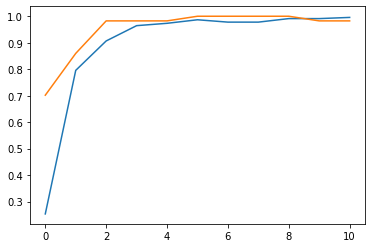

In [338]:
# Plot and Evaluate
plt.plot(history.history["categorical_accuracy"], label='accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_accuracy')

In [339]:
# Make Test Prediction
predict = model.predict(test_gen)
predict

array([[2.20117581e-05, 1.05049985e-04, 2.09575956e-04, ...,
        2.53518119e-05, 1.12580681e-04, 9.51760303e-05],
       [2.31385287e-02, 2.16004606e-02, 2.64686160e-02, ...,
        2.35284381e-02, 3.22215438e-01, 3.78304496e-02],
       [1.93770486e-03, 6.69441884e-04, 1.03177375e-03, ...,
        1.47113530e-03, 2.55124265e-04, 5.50312398e-04],
       ...,
       [3.07816983e-04, 1.51266882e-04, 3.70673544e-04, ...,
        3.76827113e-04, 1.27007475e-03, 1.06390321e-03],
       [5.00385184e-04, 1.08374632e-04, 8.43152462e-04, ...,
        6.52165560e-04, 1.11219349e-04, 1.50896376e-04],
       [3.45457741e-03, 5.12110710e-04, 2.06349324e-03, ...,
        9.61722457e-04, 2.68249447e-03, 3.69040383e-04]], dtype=float32)

In [340]:
# Find Most Likely Class for each Image
prediction_id = np.argmax(predict, axis=1)
prediction_id

array([ 8, 27, 12, 22,  7,  6,  5, 22, 28, 25,  2,  9, 15, 17, 24,  4, 18,
       17, 14,  4,  0, 14, 24,  3, 23,  7, 27, 16, 14, 28,  8,  4, 27, 23,
       15, 11, 27, 26, 20, 23,  1, 15,  0, 16, 14,  7,  6,  2, 12, 13,  1,
       23, 19,  2,  6, 28,  0, 25, 27, 16, 19,  0, 20, 20, 16, 15,  0,  2,
        3, 15, 23, 11, 10, 13, 24, 21, 12,  3, 27, 20, 13,  2, 16, 25,  9,
       10, 16, 20,  0, 10, 11,  6,  9,  6, 24])

In [341]:
# Get Conversion Dictionary
class_dict = train_gen.class_indices
class_dict = {v: k for k, v in class_dict.items()}
class_dict

{0: 'Alejandra',
 1: 'Alessandro',
 2: 'Anastasia',
 3: 'Andrea Ran',
 4: 'Anna',
 5: 'Bruno',
 6: 'Clarissa',
 7: 'Daiane',
 8: 'Diego',
 9: 'Ewa',
 10: 'Fernanda',
 11: 'Gabriel',
 12: 'Garret',
 13: 'Juliana',
 14: 'Kasia',
 15: 'Kateryna',
 16: 'Klara',
 17: 'Luis',
 18: 'Mark',
 19: 'Massimiliano',
 20: 'Matheus',
 21: 'Miia',
 22: 'Mykhailo',
 23: 'Paolo',
 24: 'Rayanne',
 25: 'Romeo',
 26: 'Valeriia',
 27: 'Vitalijs',
 28: 'Weslley'}

In [342]:
# Convert Prediction Indices to Names
prediction_name = []

for id in prediction_id:
    prediction_name.append(class_dict[id])

prediction_name


['Diego',
 'Vitalijs',
 'Garret',
 'Mykhailo',
 'Daiane',
 'Clarissa',
 'Bruno',
 'Mykhailo',
 'Weslley',
 'Romeo',
 'Anastasia',
 'Ewa',
 'Kateryna',
 'Luis',
 'Rayanne',
 'Anna',
 'Mark',
 'Luis',
 'Kasia',
 'Anna',
 'Alejandra',
 'Kasia',
 'Rayanne',
 'Andrea Ran',
 'Paolo',
 'Daiane',
 'Vitalijs',
 'Klara',
 'Kasia',
 'Weslley',
 'Diego',
 'Anna',
 'Vitalijs',
 'Paolo',
 'Kateryna',
 'Gabriel',
 'Vitalijs',
 'Valeriia',
 'Matheus',
 'Paolo',
 'Alessandro',
 'Kateryna',
 'Alejandra',
 'Klara',
 'Kasia',
 'Daiane',
 'Clarissa',
 'Anastasia',
 'Garret',
 'Juliana',
 'Alessandro',
 'Paolo',
 'Massimiliano',
 'Anastasia',
 'Clarissa',
 'Weslley',
 'Alejandra',
 'Romeo',
 'Vitalijs',
 'Klara',
 'Massimiliano',
 'Alejandra',
 'Matheus',
 'Matheus',
 'Klara',
 'Kateryna',
 'Alejandra',
 'Anastasia',
 'Andrea Ran',
 'Kateryna',
 'Paolo',
 'Gabriel',
 'Fernanda',
 'Juliana',
 'Rayanne',
 'Miia',
 'Garret',
 'Andrea Ran',
 'Vitalijs',
 'Matheus',
 'Juliana',
 'Anastasia',
 'Klara',
 'Romeo',


In [343]:
# Prep for Submission
df = pd.DataFrame(prediction_name, columns=['name'])
df.index.name = 'id'
df.to_csv('submission.csv')